In [1]:
import pathlib
import pandas as pd
import numpy as np
from typing import Union
import matplotlib.pyplot as plt
import seaborn as sns
import clean_data_microscope as cdm
import files_process_save as fps

In [2]:
def clean_micro_df(micro_df: pd.DataFrame):
    """
    Cleans values of microscopic dataframes with all the cleansing functions

    Parameters
    ----------
    micro_df: pd.DataFrame

    Return
    ----------
    micro_df: pd.DataFrame
    """
    cdm.fix_object_cols_to_float(micro_df)
    cdm.remove_negatives(micro_df)
    return micro_df

In [3]:
micro_path = fps.check_file("micro - total.csv")
data_microscopic = pd.read_csv(micro_path)
data_microscopic['Time'] = pd.to_datetime(data_microscopic['Time'], dayfirst=True).dt.normalize()
data_microscopic = data_microscopic.set_index('Time')
data_microscopic = data_microscopic[~data_microscopic.index.duplicated(keep='first')]
data_microscopic = clean_micro_df(data_microscopic)

In [4]:
data_microscopic

arcella1  nude ameba1  aspidisca1  trachelopylum1  lionutus1  \
Time                                                                       
2010-01-04       NaN          NaN         NaN             NaN        NaN   
2010-02-02      67.0          8.0         NaN             1.0        4.0   
2010-02-08       NaN          NaN         NaN             NaN        NaN   
2010-02-23       NaN          NaN         NaN             NaN        NaN   
2010-03-04       NaN          NaN         NaN             NaN        NaN   
...              ...          ...         ...             ...        ...   
2020-08-06       NaN          NaN         NaN             NaN        NaN   
2020-08-17       5.0          5.0        12.0             2.0       10.0   
2020-08-19       NaN          NaN         NaN             NaN        NaN   
2020-08-23       NaN          NaN         NaN             NaN        NaN   
2020-08-27      15.0          5.0        15.0             1.0       26.0   

            paramecium1  epistylis1  vorticella1  carchecium1  tokophyra1  \
Time                                                                        
2010-01-04          NaN         NaN          NaN          NaN         NaN   
2010-02-02          NaN         9.0         53.0          6.0         NaN   
2010-02-08          NaN         NaN          NaN          NaN         NaN   
2010-02-23          NaN         NaN          NaN          NaN         NaN   
2010-03-04          NaN         NaN          NaN          NaN         NaN   
...                 ...         ...          ...          ...         ...   
2020-08-06          NaN         NaN          NaN          NaN         NaN   
2020-08-17          1.0        70.0         23.0          0.0         0.0   
2020-08-19          NaN         NaN          NaN          NaN         NaN   
2020-08-23          NaN         NaN          NaN          NaN         NaN   
2020-08-27          4.0        36.0         31.0          2.0         0.0   

            ...  spirochaetes4  Nocardia4  Microthrix4  N. Limicola4  \
Time        ...                                                        
2010-01-04  ...           18.0        NaN          NaN           NaN   
2010-02-02  ...            NaN        NaN          NaN           NaN   
2010-02-08  ...            NaN        NaN          NaN           NaN   
2010-02-23  ...            0.0        NaN          NaN           NaN   
2010-03-04  ...            1.0        NaN          NaN           NaN   
...         ...            ...        ...          ...           ...   
2020-08-06  ...            NaN        NaN          NaN           NaN   
2020-08-17  ...            NaN        NaN          NaN           NaN   
2020-08-19  ...            NaN        NaN          NaN           NaN   
2020-08-23  ...         3500.0        0.0          NaN           4.0   
2020-08-27  ...            NaN        NaN          NaN           NaN   

            Thiothrix4  0041_0675 4  0092 4  1851 4  beggiatoa4  zoogloea4  
Time                                                                        
2010-01-04         NaN          NaN     NaN     NaN         NaN        NaN  
2010-02-02         NaN          NaN     NaN     NaN         NaN        NaN  
2010-02-08         NaN          NaN     NaN     NaN         NaN        NaN  
2010-02-23         NaN          NaN     NaN     NaN         NaN        NaN  
2010-03-04         NaN          NaN     NaN     NaN         NaN        NaN  
...                ...          ...     ...     ...         ...        ...  
2020-08-06         NaN          NaN     NaN     NaN         NaN        NaN  
2020-08-17         NaN          NaN     NaN     NaN         NaN        NaN  
2020-08-19         NaN          NaN     NaN     NaN         NaN        NaN  
2020-08-23         3.0          4.0     NaN     1.0         3.0        2.0  
2020-08-27         NaN          NaN     NaN     NaN         NaN        NaN  

[708 rows x 108 columns]

In [5]:
organisms_ist= [
            "arcella",
            "nude ameba",
            "aspidisca",
            "trachelopylum",
            "lionutus",
            "paramecium",
            "epistylis",
            "vorticella",
            "carchecium",
            "tokophyra",
            "podophyra",
            "opercularia",
            "rotifer",
            "nematode",
            "worms",
            "peranema trich",
            "micro flagellates",
            "spirochaetes",
            "Nocardia",
            "Microthrix",
            "N. Limicola",
            "Thiothrix",
            "0041_0675 ",
            "0092 ",
            "1851 ",
            "beggiatoa",
            "zoogloea"
        ]

In [6]:
### create 'tidy' dataframe
i=2
org_df = data_microscopic.iloc[:, np.r_[i, i+27, i+27*2, i+27*3]]
org_df = org_df.stack().reset_index()
org_df.columns = ['Time', 'Reactor', organisms_ist[i]]
for i in range(1,5):
    org_df = org_df.replace(f"{organisms_ist[i]}{i}", f"Reactor {i}")
org_df = org_df.sort_values(by=['Reactor'])
org_df['Month'] = pd.DatetimeIndex(org_df['Time']).month
org_df['Year'] = pd.DatetimeIndex(org_df['Time']).year
org_df['Season'] = org_df.Month.apply(lambda x: 'spring' if x >= 3 and x<=5 else(
                                                   'summer' if x >= 6 and x<=8 else( 
                                                   'fall' if x >= 9 and x<=11 else('winter'))))

In [7]:
org_df

Time     Reactor  aspidisca  Month  Year  Season
0   2010-01-04   Reactor 2        8.0      1  2010  winter
460 2014-09-22   Reactor 2       19.0      9  2014    fall
457 2014-09-08   Reactor 2        2.0      9  2014    fall
456 2014-09-02   Reactor 2       17.0      9  2014    fall
452 2014-06-26   Reactor 2        2.0      6  2014  summer
..         ...         ...        ...    ...   ...     ...
719 2018-08-13  aspidisca4        3.0      8  2018  summer
157 2011-10-11  aspidisca4        3.0     10  2011    fall
450 2014-06-16  aspidisca4        2.0      6  2014  summer
148 2011-09-26  aspidisca4        0.0      9  2011    fall
242 2012-02-26  aspidisca4        4.0      2  2012  winter

[975 rows x 6 columns]

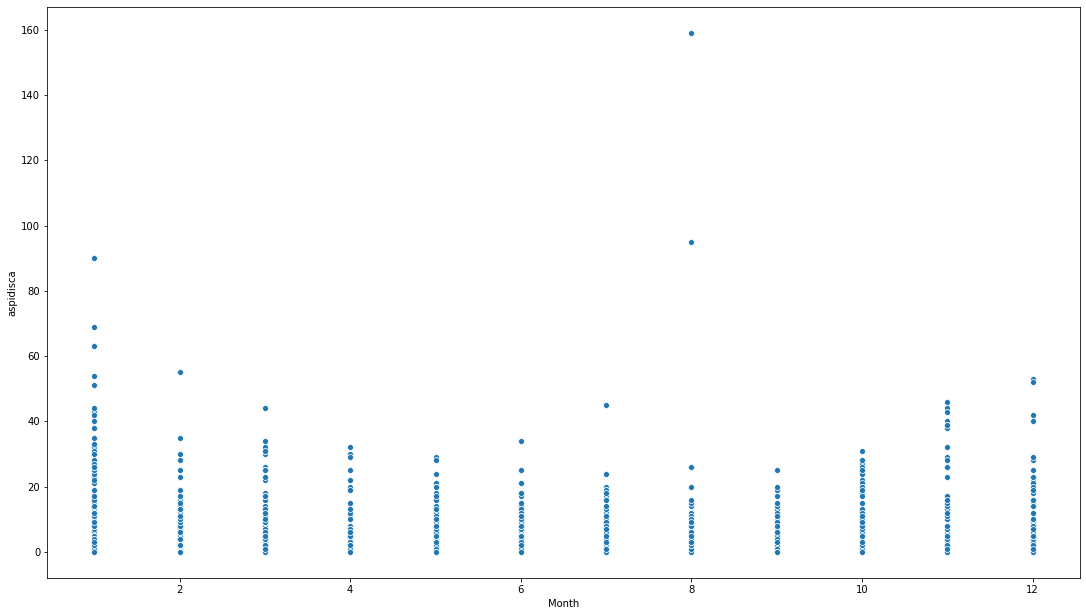

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=org_df, x="Month", y=org_df.iloc[:,2], ax=ax)
#plt.xticks(np.arange(0, 13, step=1))

Text(0.5, 1.0, 'aspidisca')

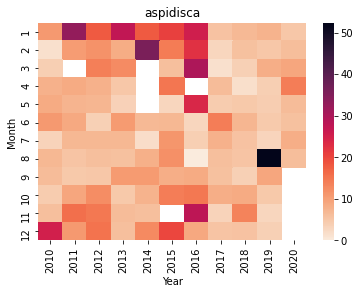

In [9]:
table = pd.pivot_table(org_df, values=org_df.columns[2], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(org_df.columns[2])

In [280]:
#sns.distplot(aspidisca_df["aspidisca"])

In [278]:
### plot scater plot with seaborn with col
#g = sns.relplot('Time', 'aspidisca', data=aspidisca_df, hue='Reactor', col="Season")
#plt.xlim(aspidisca_df['Time'].min(), aspidisca_df['Time'].max())


(733776.0, 737664.0)

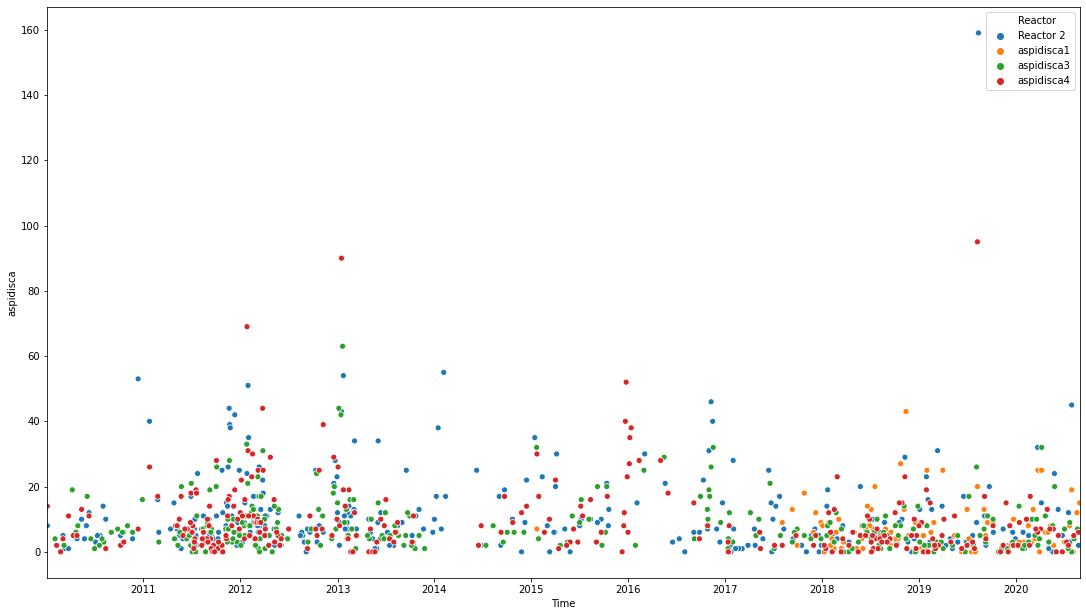

In [10]:
### plot scater plot with seaborn
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=org_df, x="Time", y=org_df.columns[2], hue="Reactor", ax=ax)
plt.xlim(org_df['Time'].min(), org_df['Time'].max())

In [11]:
### create 'tidy' dataframes for all microorganisms
micro_df_list = []
for i in range (0, 27):
    micro_org_df = data_microscopic.iloc[:, np.r_[i, i+27, i+27*2, i+27*3]]
    micro_org_df = micro_org_df.stack().reset_index()
    micro_org_df.columns = ['Time', 'Reactor', organisms_ist[i]]
    for j in range(1,5):
        micro_org_df = micro_org_df.replace(f"{organisms_ist[i]}{j}", f"Reactor {j}")
    micro_org_df = micro_org_df.sort_values(by=['Reactor'])
    micro_org_df['Month'] = pd.DatetimeIndex(micro_org_df['Time']).month
    micro_org_df['Year'] = pd.DatetimeIndex(micro_org_df['Time']).year
    micro_org_df['Season'] = micro_org_df.Month.apply(lambda x: 'spring' if x >= 3 and x<=5 else(
                                               'summer' if x >= 6 and x<=8 else( 
                                               'fall' if x >= 9 and x<=11 else('winter'))))
    micro_df_list.append(micro_org_df)


In [12]:
#micro_df_list[0]

<ipython-input-13-316e74d84075>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-13-316e74d84075>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-13-316e74d84075>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipytho

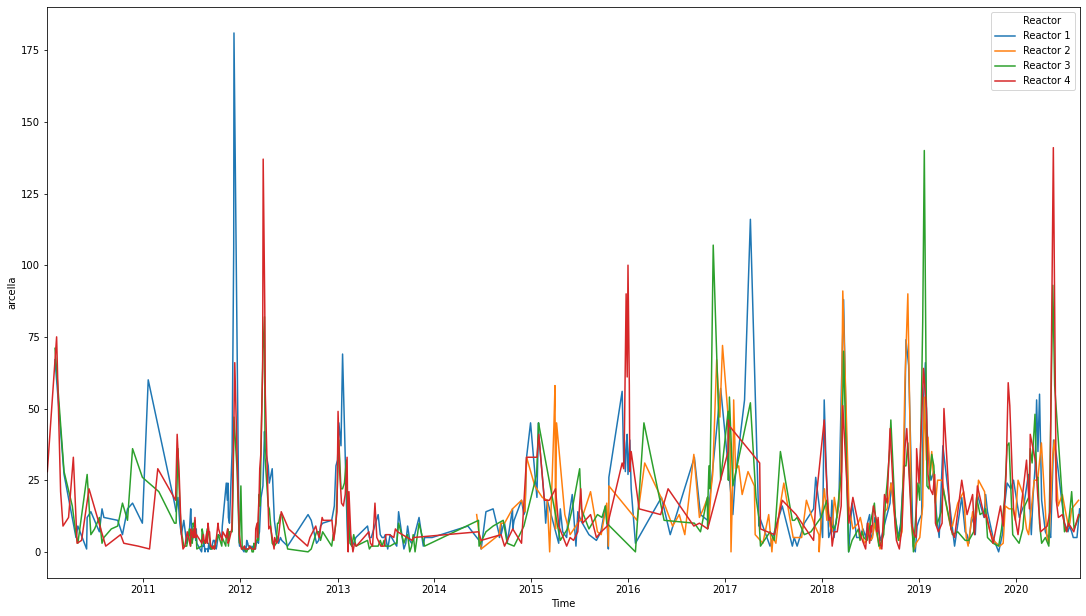

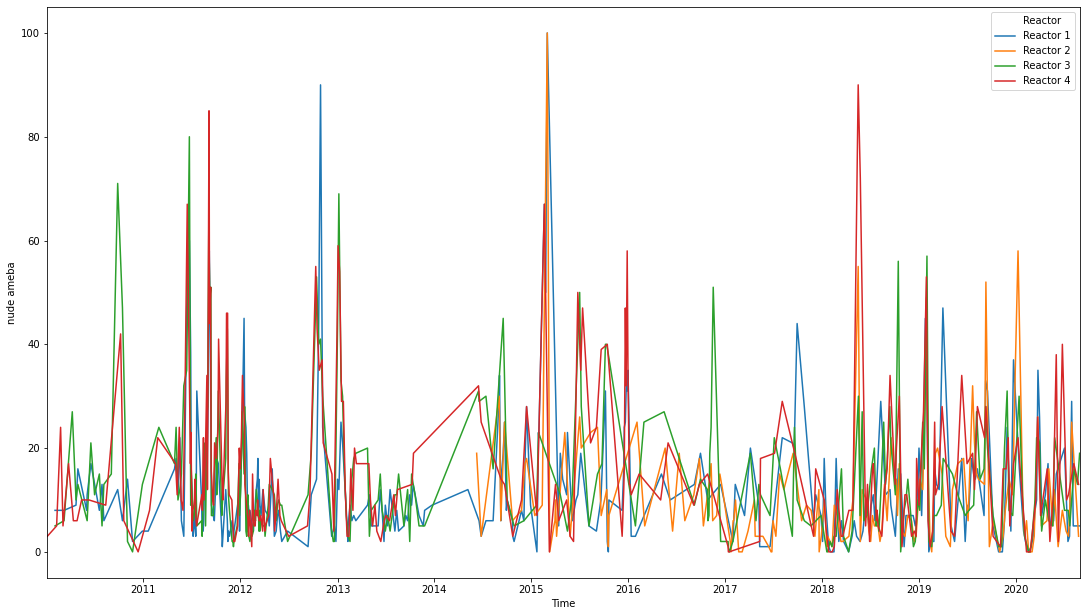

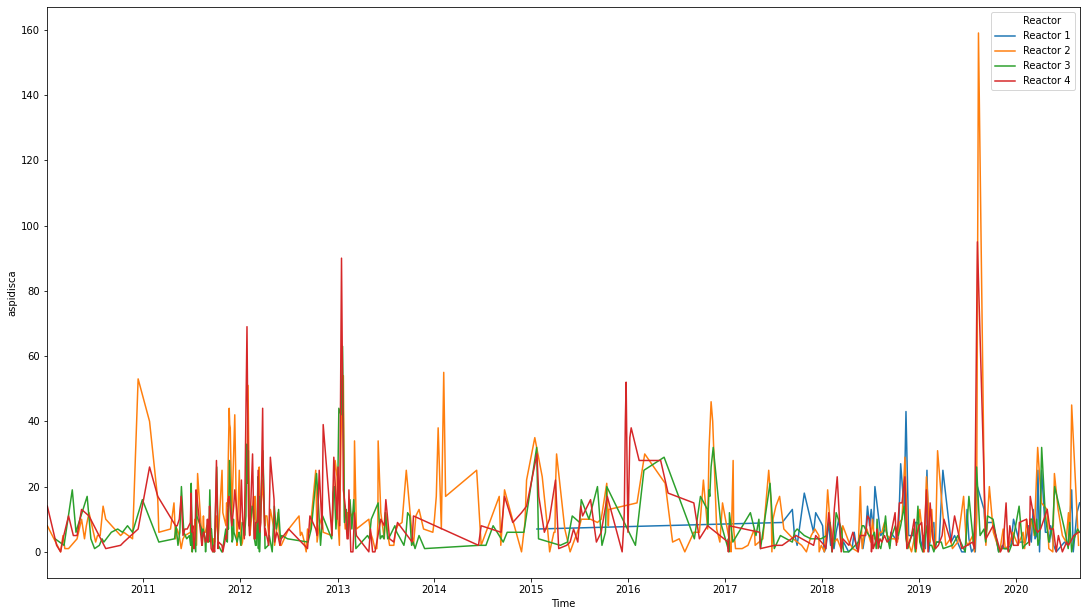

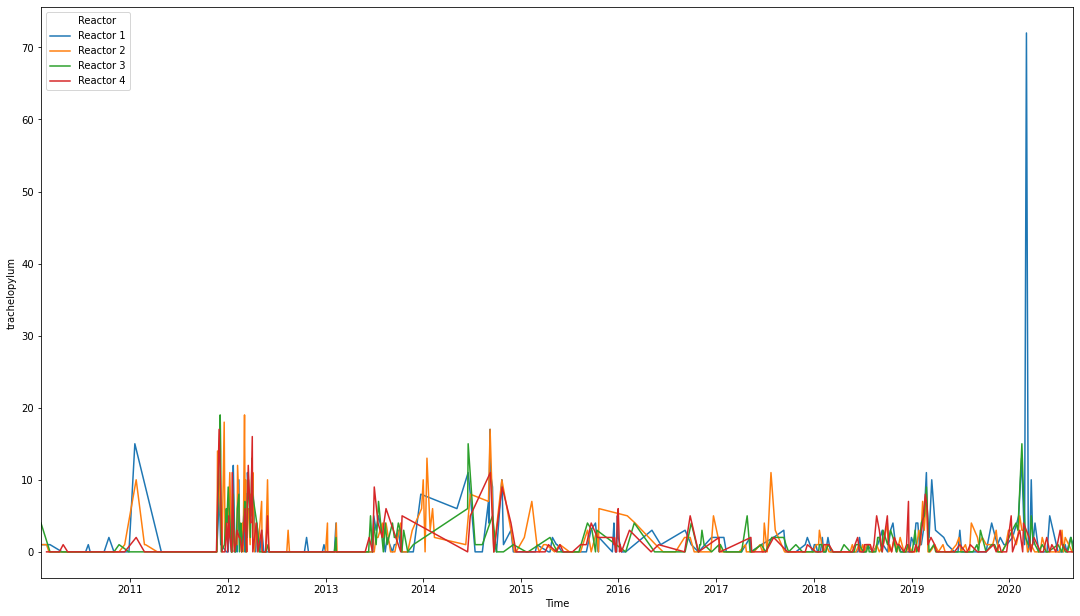

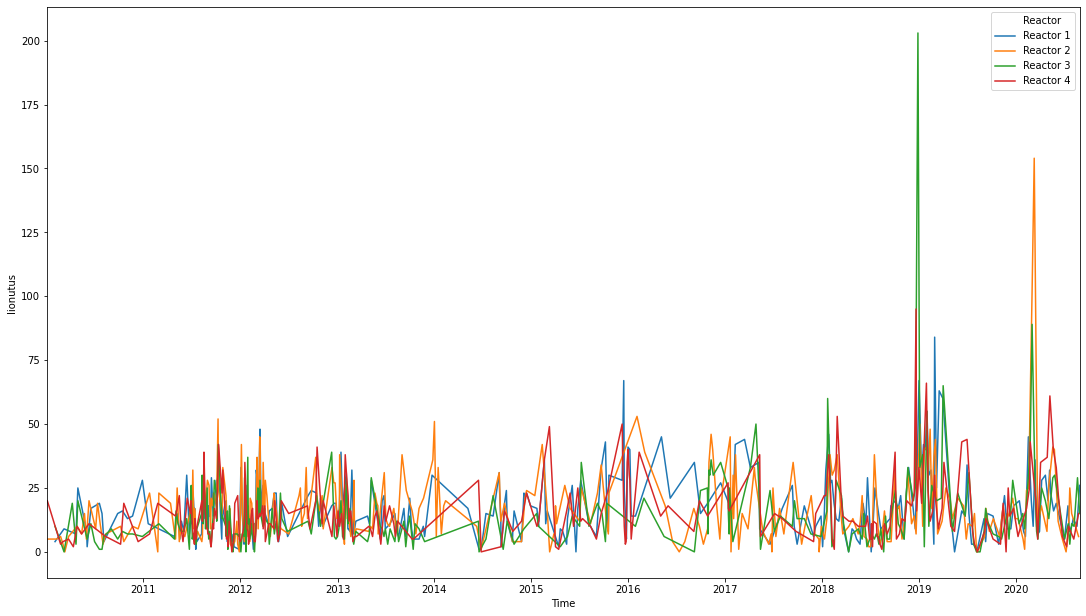

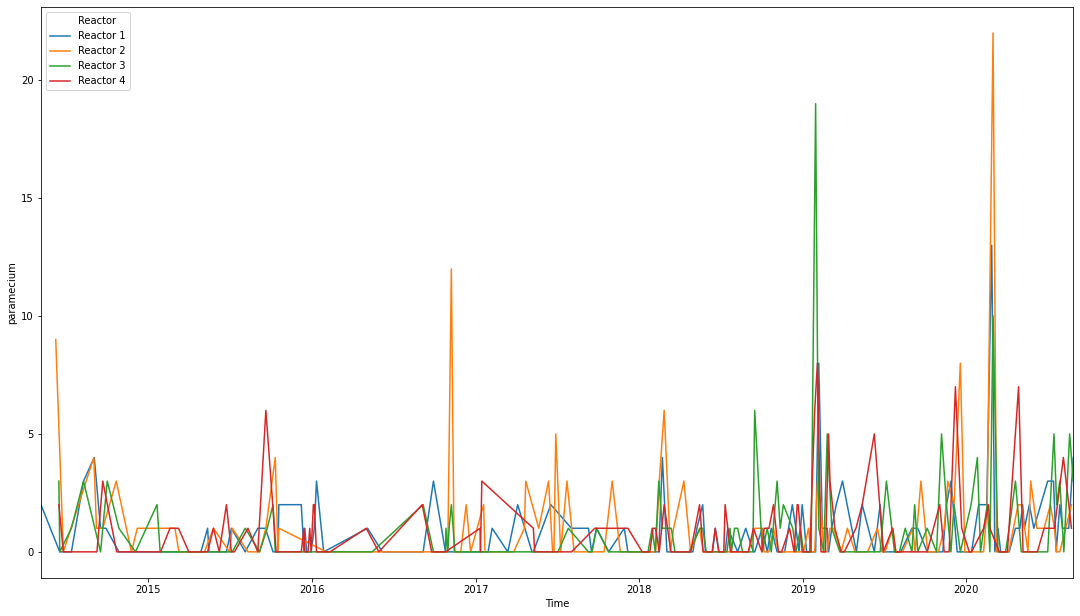

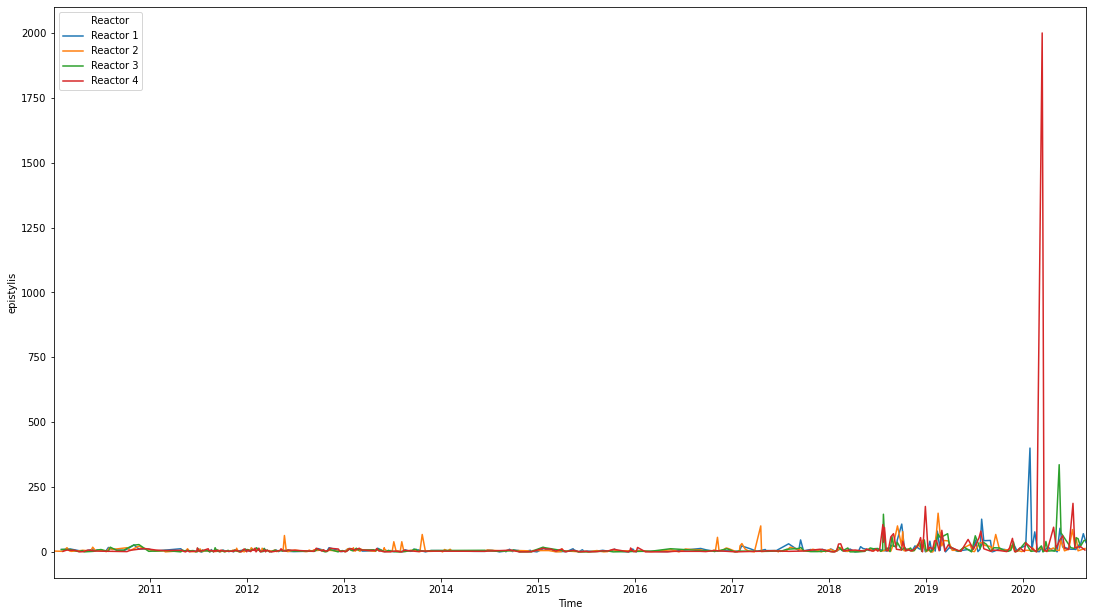

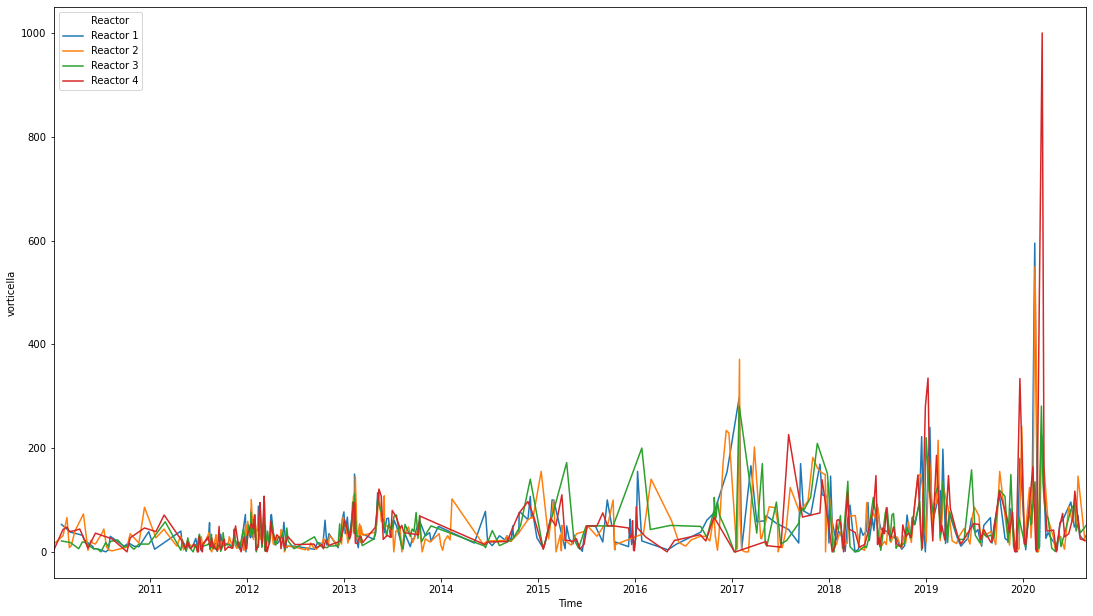

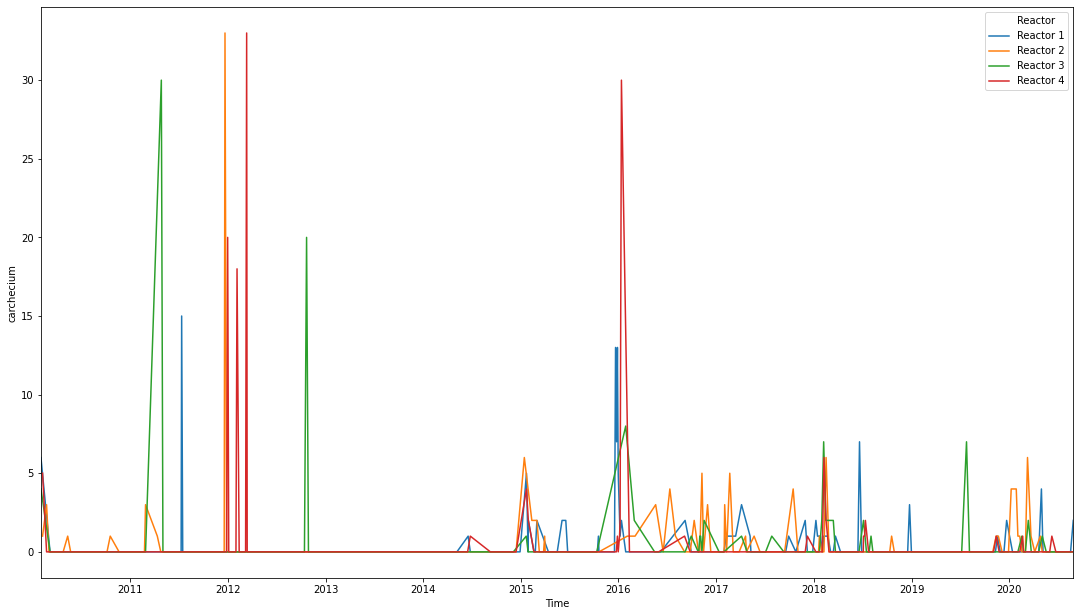

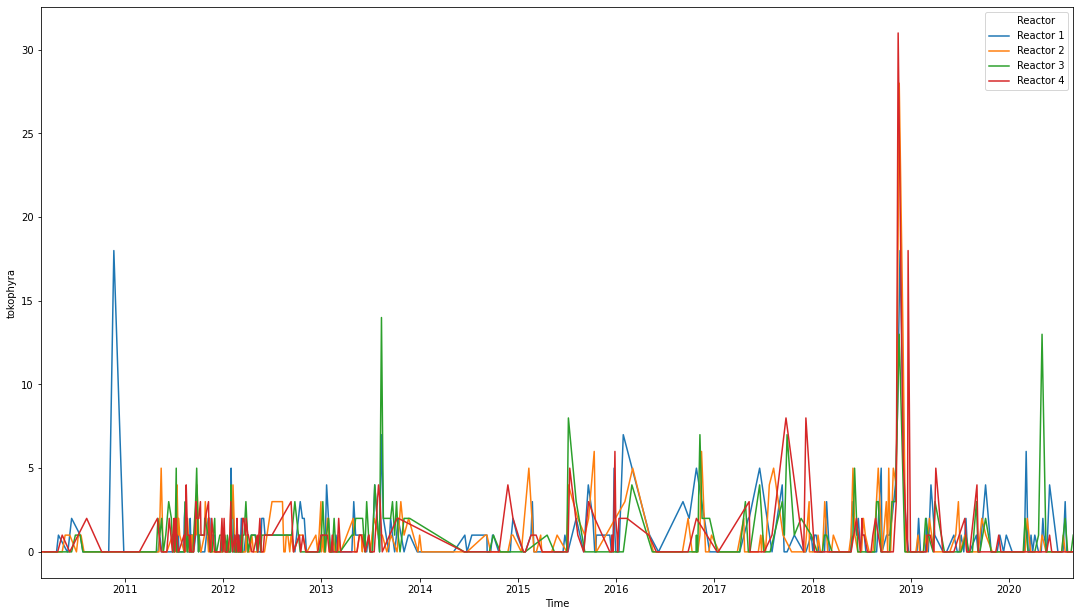

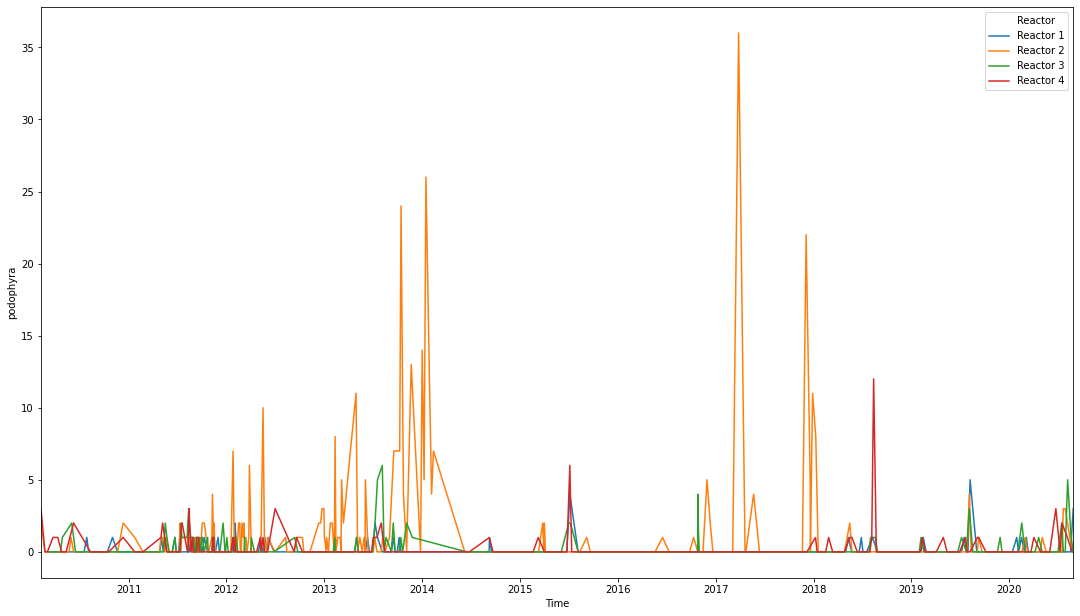

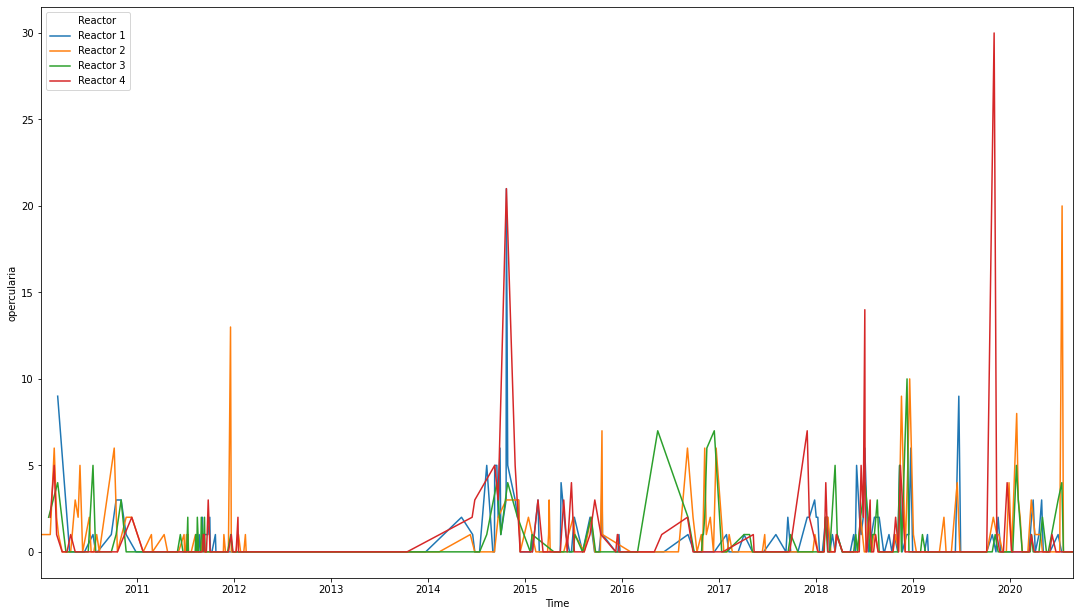

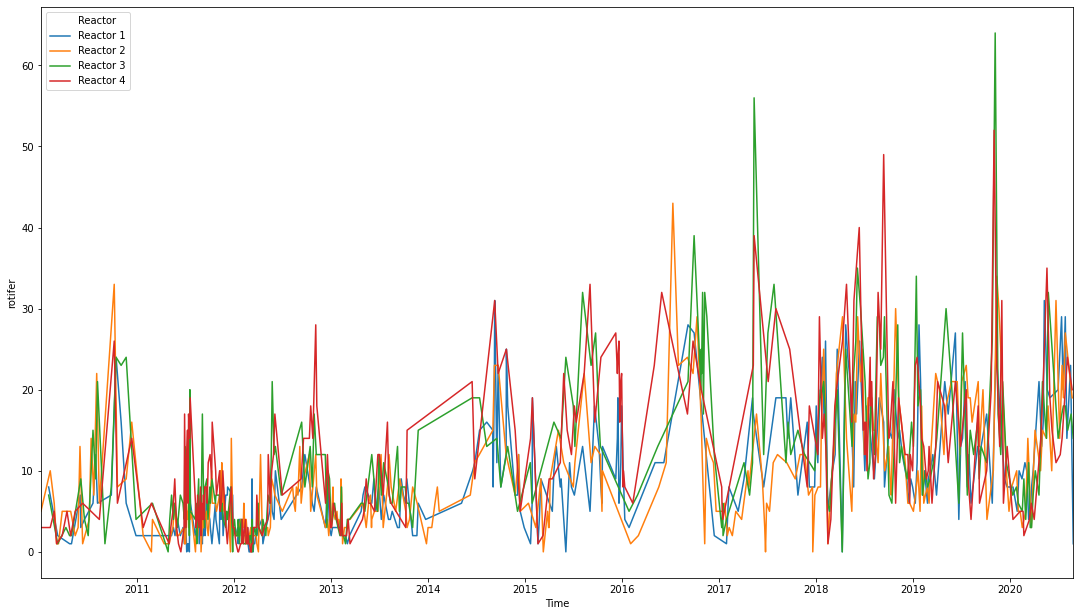

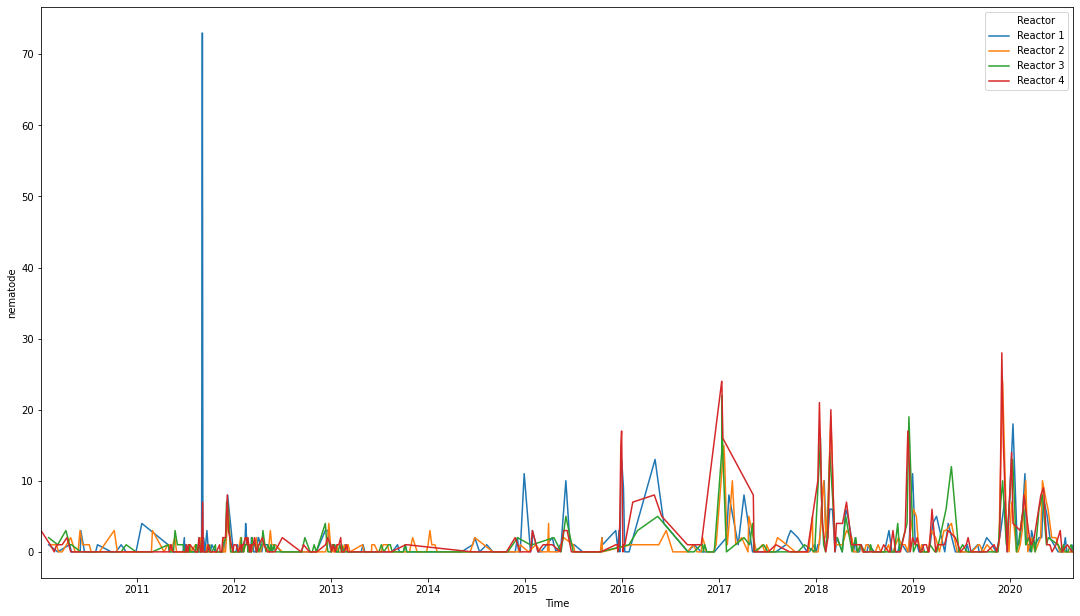

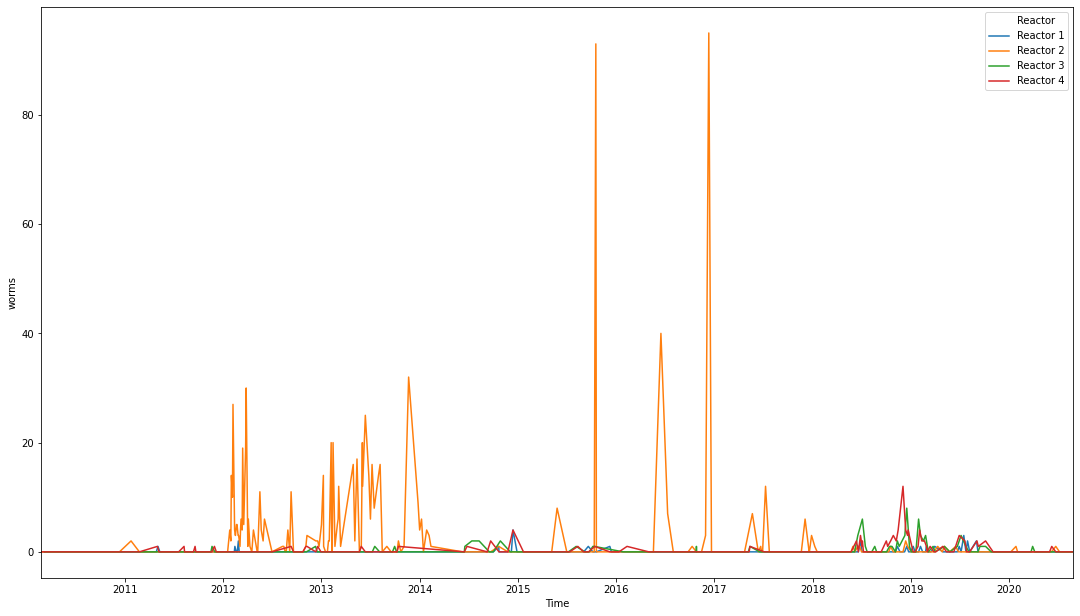

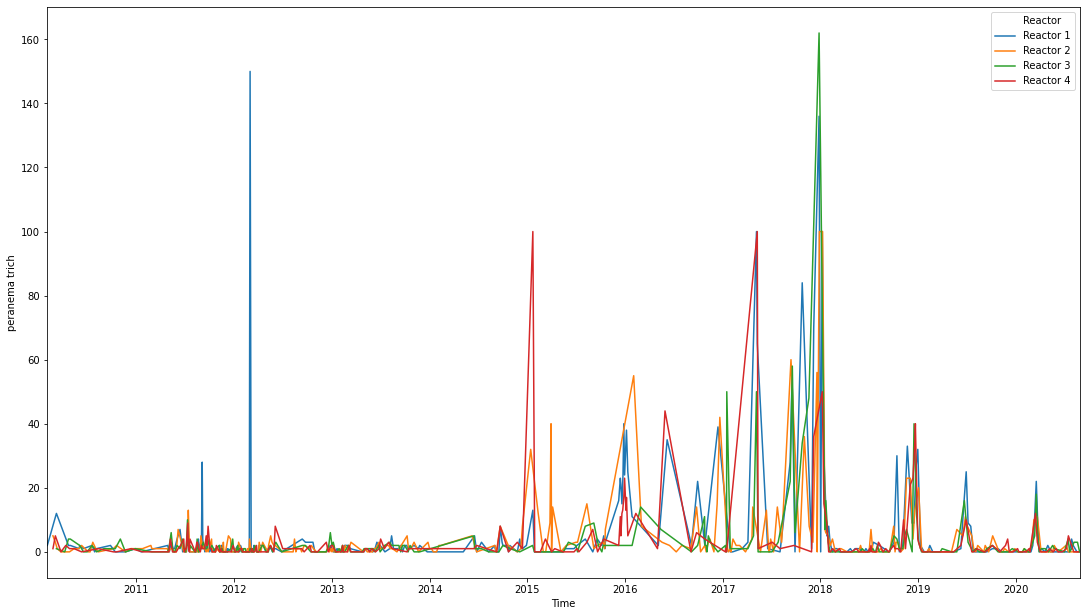

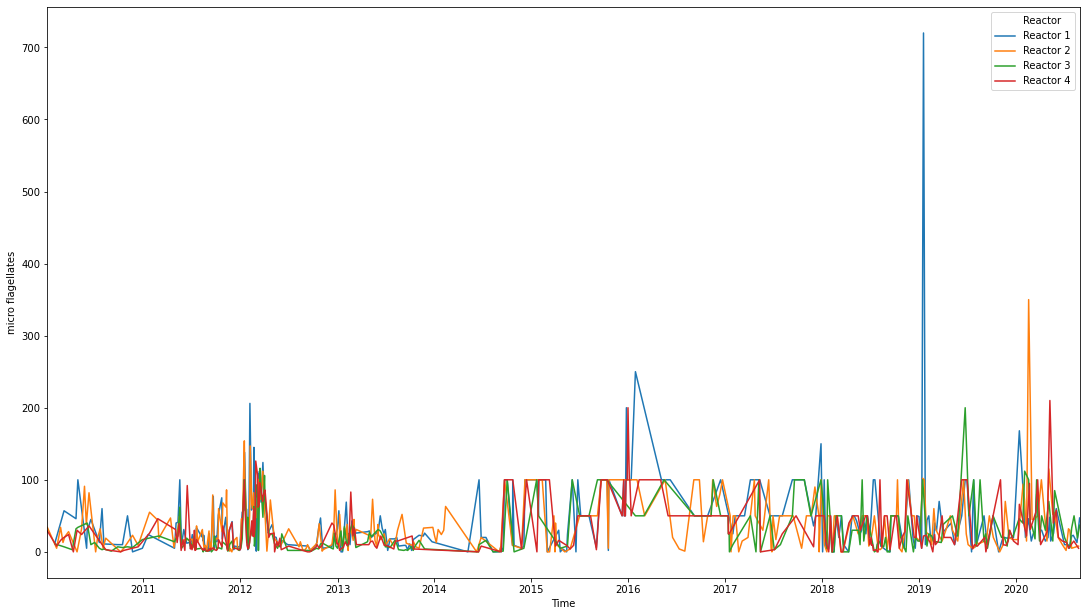

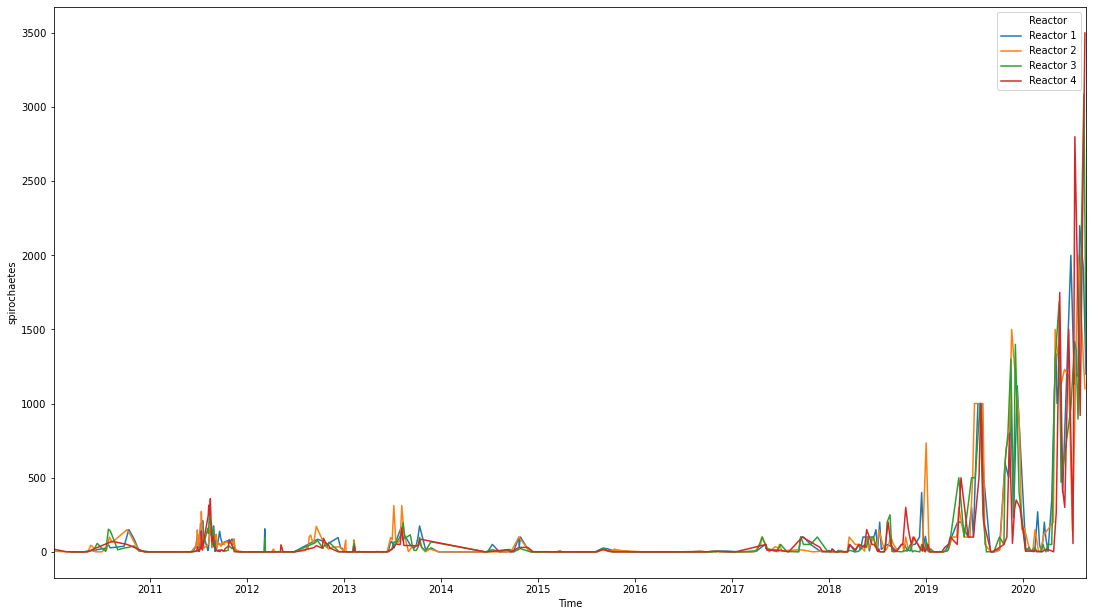

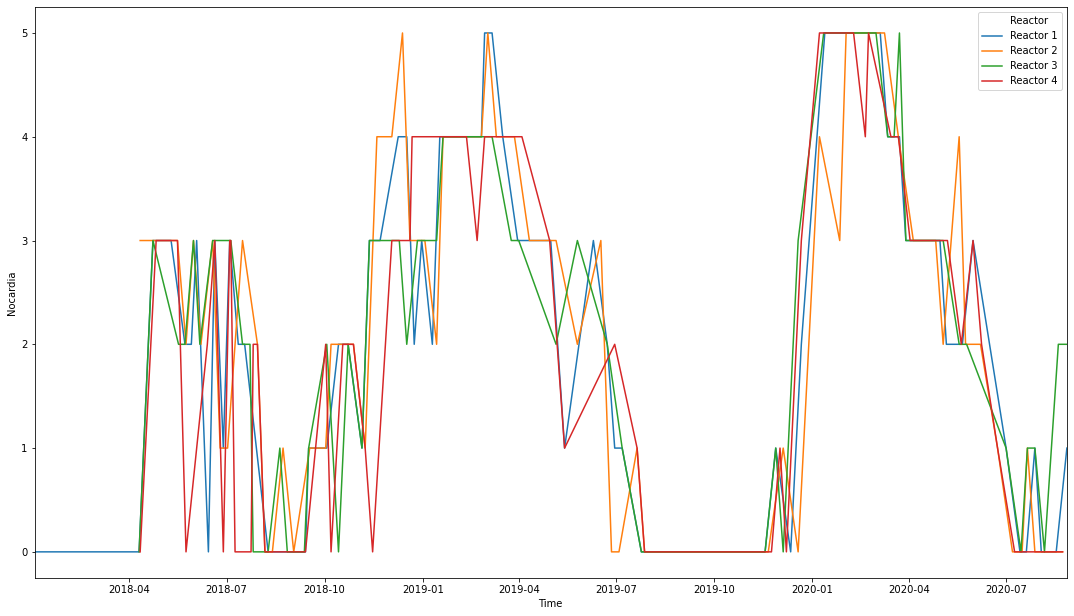

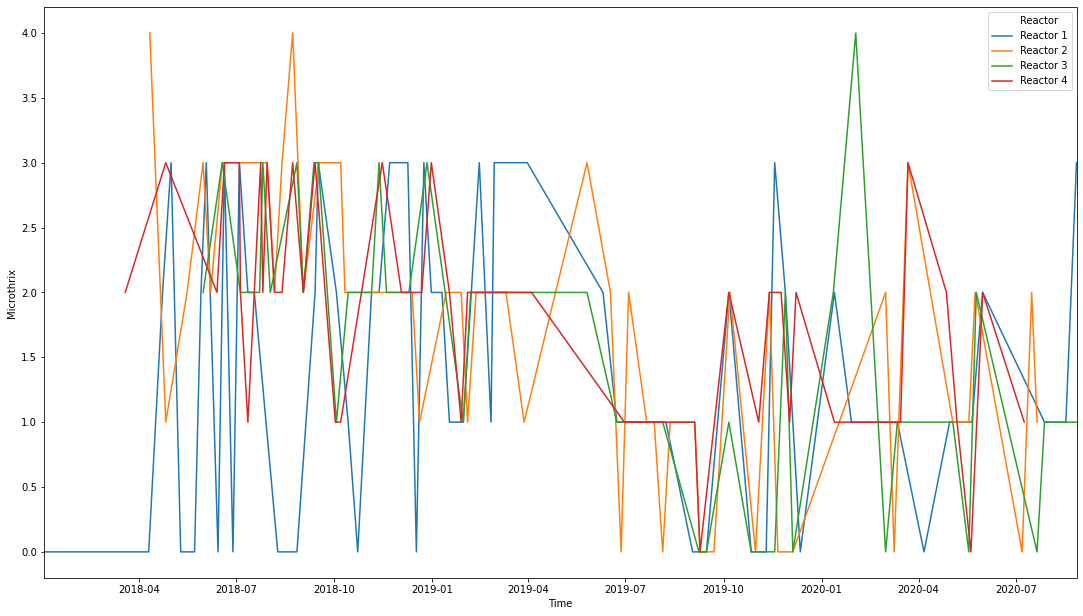

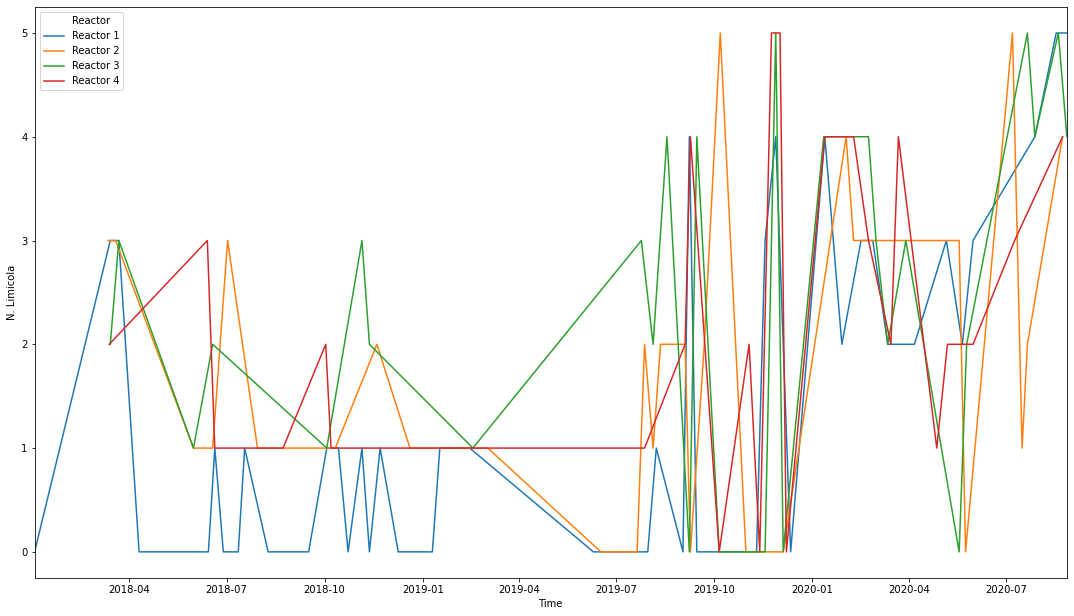

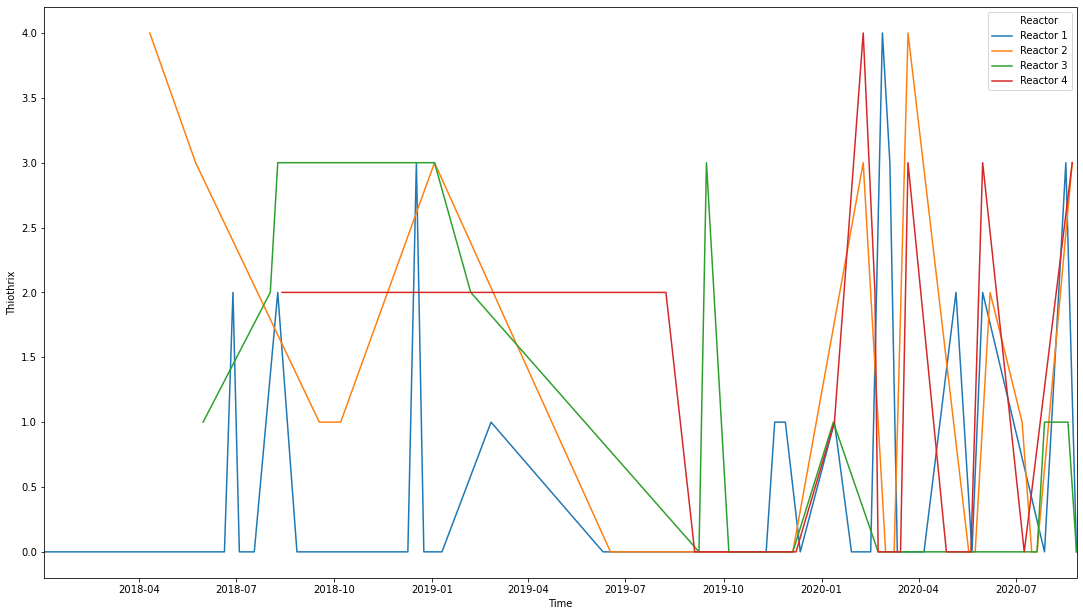

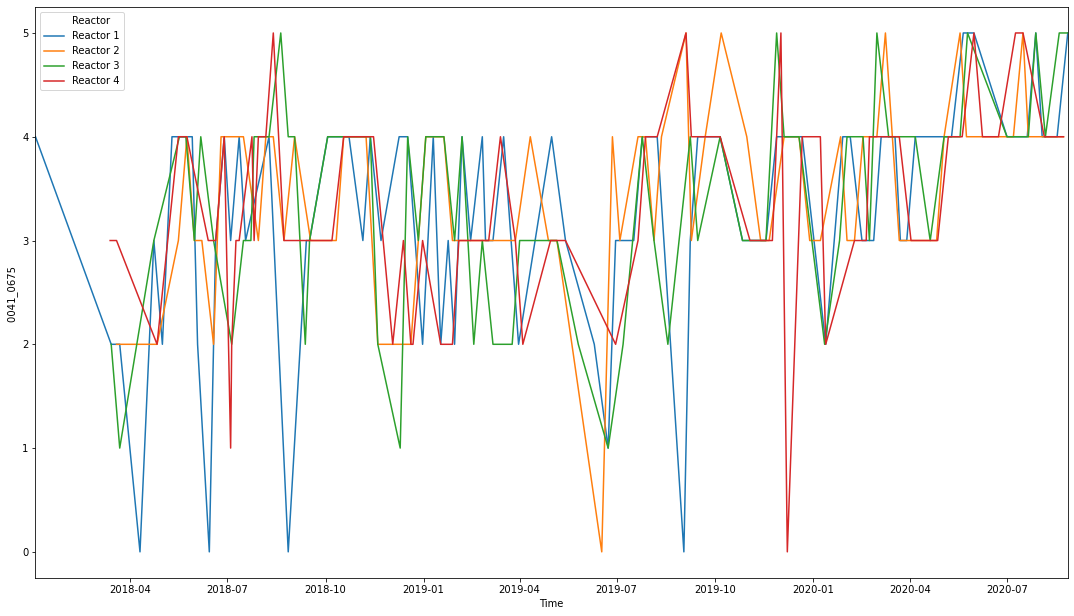

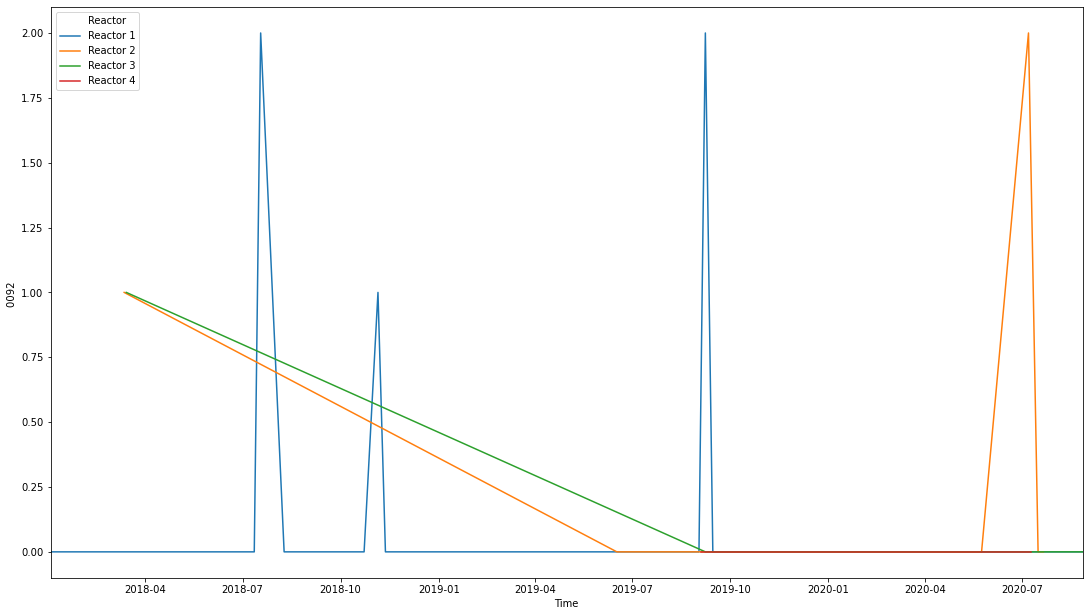

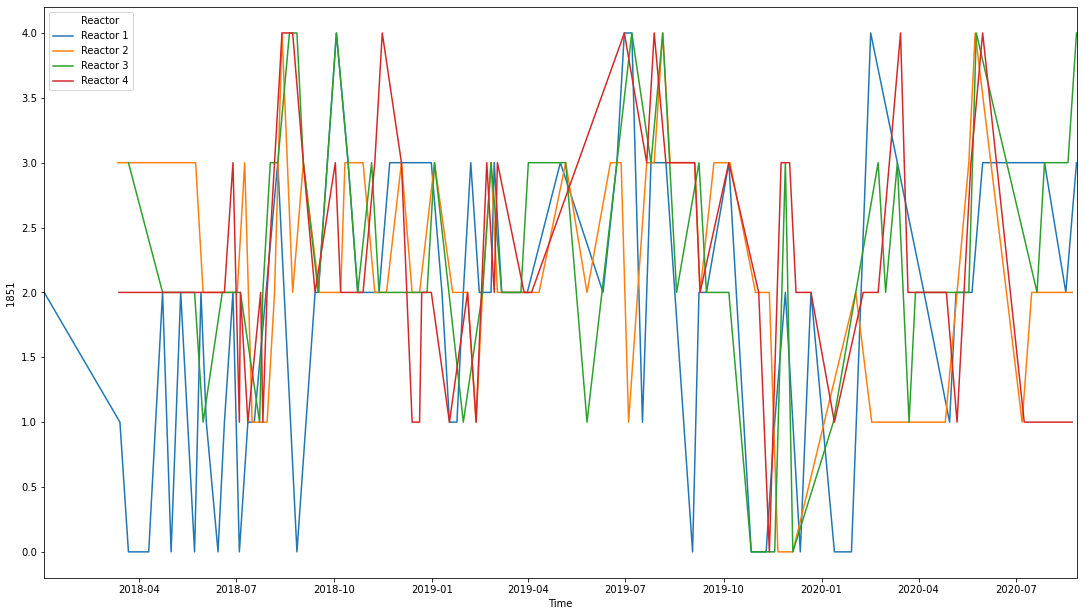

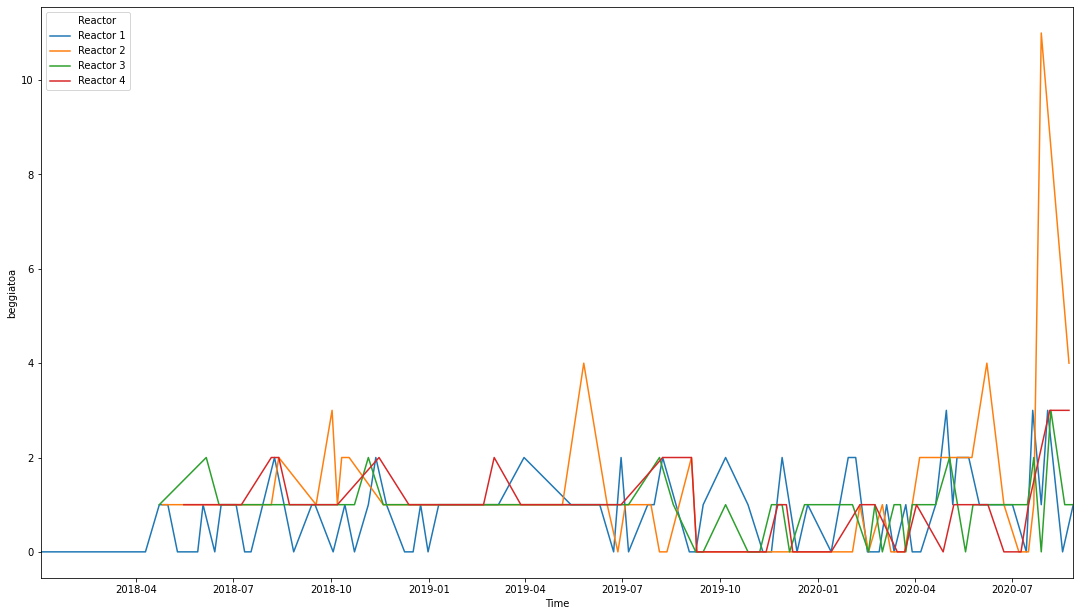

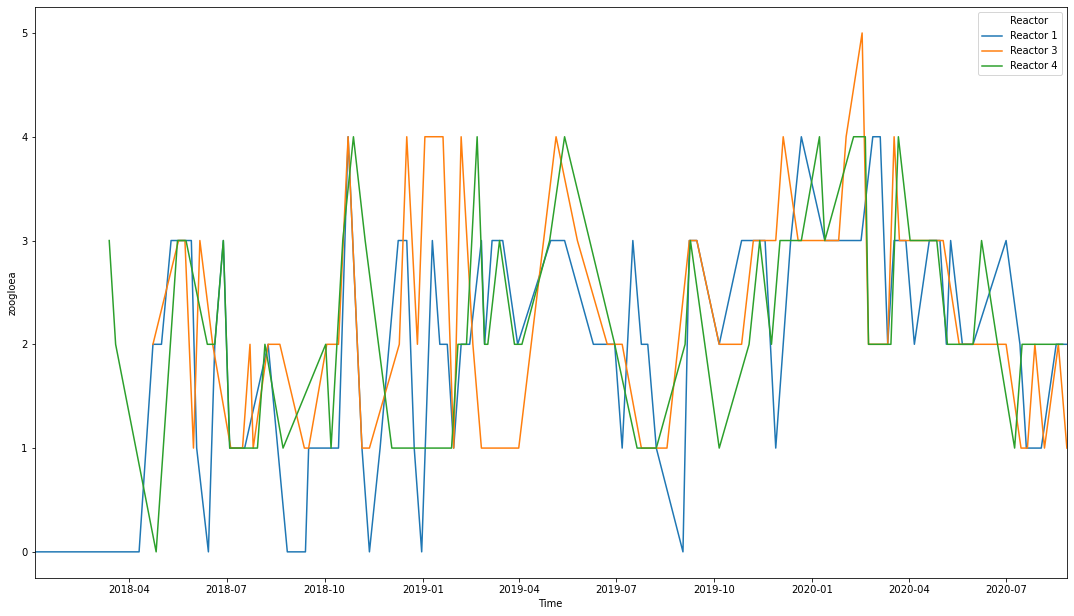

In [13]:
for i in range (0, 27):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    g = sns.lineplot(data=micro_df_list[i], x="Time", y=organisms_ist[i], hue="Reactor", ax=ax)
    #g = sns.relplot('Time', 'Arcella', data=arcella_df, hue='Reactor')
    plt.xlim(micro_df_list[i]['Time'].min(), micro_df_list[i]['Time'].max())
    plt.savefig(f"figures/microscopic_organisms/{organisms_ist[i]}.png", bbox_inches="tight")

In [15]:
organisms_ist1= [
            "ameoba_arcella",
            "ameoba_nude ameba",
            "crawling ciliates_aspidisca",
            "crawling ciliates_trachelopylum",
            "free swimming ciliates_lionutus",
            "free swimming ciliates_paramecium",
            "stalked ciliate_epistylis",
            "stalked ciliate_vorticella",
            "stalked ciliate_carchecium",
            "stalked ciliate_tokophyra",
            "stalked ciliate_podophyra",
            "stalked ciliate_opercularia",
            "rotifer_rotifer",
            "worms_nematode",
            "worms_worms",
            "flagellates_peranema trich",
            "flagellates_micro flagellates",
            "spirochaetes_spirochaetes",
            "Filaments_Nocardia_index",
            "Filaments_Microthrix_index",
            "Filaments_N. Limicola_index",
            "Filaments_Thiothrix_index",
            "Filaments_0041_0675_index",
            "Filaments_0092_index",
            "Filaments_1851_index",
            "Filaments_beggiatoa_index",
            "Filaments_zoogloea_index",
        ]